In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
from scipy.sparse import csr_matrix
import scanpy as sc

sc.set_figure_params(dpi=100, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = './write/zebrafish.h5ad'

scanpy==1.5.1 anndata==0.7.3 umap==0.4.4 numpy==1.19.0 scipy==1.5.0 pandas==1.0.5 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.7.0 leidenalg==0.8.1


In [2]:
adata = sc.read_csv("../datasets/data.csv")

In [3]:
adata

AnnData object with n_obs × n_vars = 26586 × 6026

In [4]:
adata.write(results_file)

In [5]:
adata = sc.read(results_file)

Filter out data

In [6]:
sc.pp.recipe_zheng17(adata)

running recipe zheng17
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
normalizing counts per cell
    finished (0:00:00)
    finished (0:00:11)


In [20]:
sc.pp.neighbors(adata)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:15)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:28)


In [21]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:22)


In [22]:
sc.tl.draw_graph(adata, maxiter=100)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:01:01)


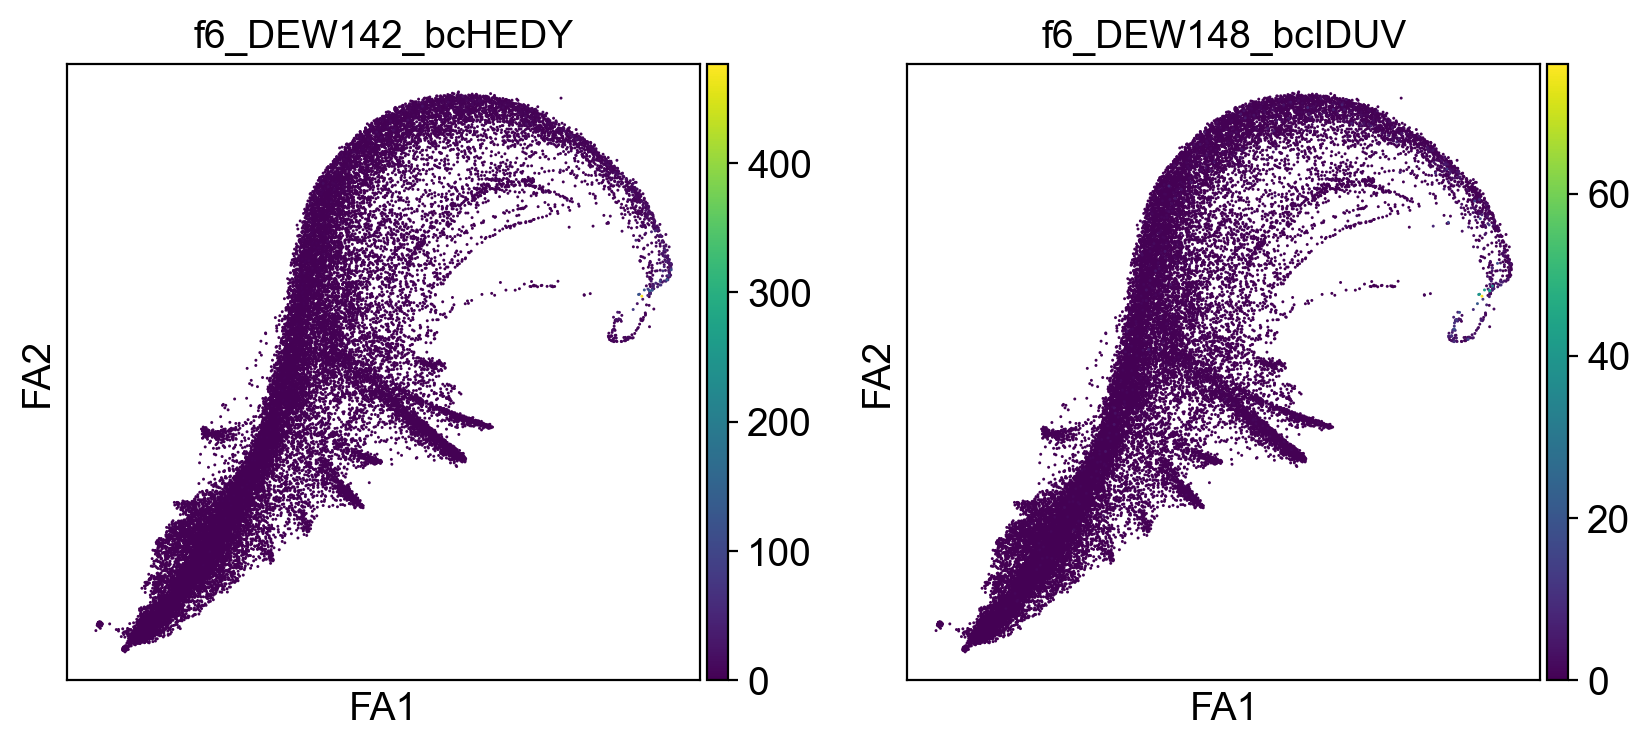

In [30]:
sc.pl.draw_graph(adata, color=['f6_DEW142_bcHEDY', 'f6_DEW148_bcIDUV'])

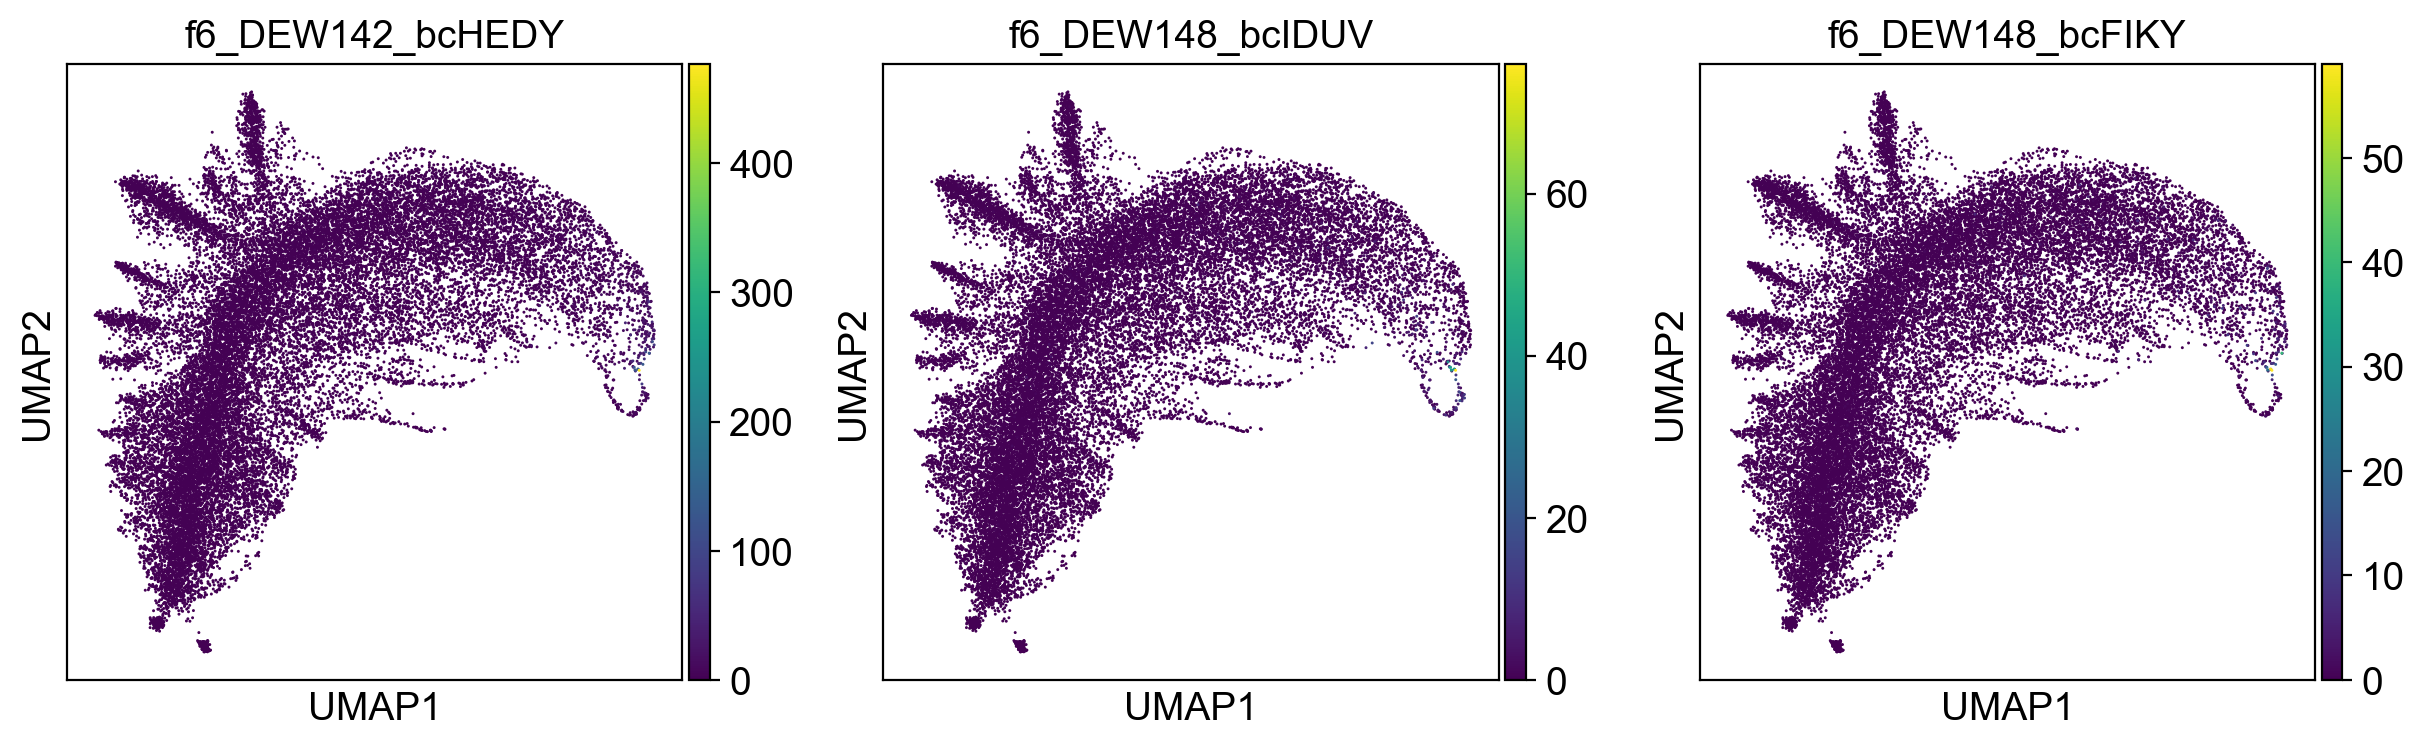

In [31]:
sc.pl.umap(adata, color=)

In [26]:
adata.var_names

Index(['f6_DEW142_bcHEDY', 'f6_DEW142_bcCYMF', 'f6_DEW142_bcDKSO',
       'f6_DEW142_bcDOVI', 'f6_DEW142_bcFLIX', 'f6_DEW142_bcGCWL',
       'f6_DEW142_bcBZHA', 'f6_DEW142_bcGPEV', 'f6_DEW142_bcGXQD',
       'f6_DEW142_bcCGJS',
       ...
       'f6_DEW148_bcCAGE', 'f6_DEW148_bcFQZF', 'f6_DEW148_bcDBYH',
       'f6_DEW148_bcFDUX', 'f6_DEW148_bcGFQA', 'f6_DEW148_bcBGOT',
       'f6_DEW148_bcHSLU', 'f6_DEW148_bcGVHN', 'f6_DEW148_bcIDUV',
       'f6_DEW148_bcFIKY'],
      dtype='object', length=6026)